<a href="https://colab.research.google.com/github/jackevansadl/CHEM3630/blob/main/workshop2-qm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Physical Chemistry III: Computational Workshop (Quantum Mechanics)

The time-independent Schrödinger equation plays a key role in quantum mechanics. Its solutions are the stationary states (states whose measurable properties do not change with time) and energies of the quantum system. The energies of stationary states are of central importance in physical chemistry, since it is energy differences between stationary states that are probed by spectroscopic methods used in much of chemical analysis.

In this workshop, Python programming will be used to solve the time-independent Schrödinger equation in one dimension (1D) numerically using *two* different general techniques, the *finite-difference method* and the *variational method*, to determine the the stationary states and energies of the system.

The 1D Schrödinger equation for the *wavefunction* $\psi(x)$ as a function of *position* $x$ is
\begin{equation}
\hat{H}\psi(x) = -\frac{\hbar^2}{2m}\frac{\mathrm{d}^2\psi(x)}{\mathrm{d} x^2} + V(x)\psi(x) = E\psi(x),
\end{equation}
where $\hat{H}$ is the *Hamiltonian operator*, $V(x)$ is the *potential energy* as a function of $x$, $m$ is the particle *mass*, and $\hbar = \frac{h}{2\pi}$, where $h$ is the *Planck constant*.

To simplify the calculations and to avoid manipulating very large or small numbers, *atomic units* (a.u.) will be used. The most relevant atomics units are this workshop are 
- mass (electron mass): $m_\mathrm{e}$
- charge (elementary charge): $e$
- angular momentum (reduced Planck constant): $\hbar$
- length (Bohr radius): $a_0 = \frac{\hbar^2}{m_e e^2}$
- energy (hartree): $E_\mathrm{h} = \frac{\hbar^2}{m_\mathrm{e}a_0^2}$

In a.u., the 1D Schrödinger equation becomes
\begin{equation}
-\frac{1}{2m}\frac{\mathrm{d}^2\psi(x)}{\mathrm{d} x^2} + V(x)\psi(x) = E\psi(x),
\end{equation}
i.e. factors of $\hbar$ disappear from the original form of the equation. Here, $m$ is in units of $m_\mathrm{e}$, $x$ in units of $a_0$, $V(x)$ and $E$ in units of $E_\mathrm{h}$, and $\psi(x)$ in units of $a_0^{-1/2}$. The units of $\psi(x)$ come from the relationship between the wavefunction and probability $P(x)$ (in 1D), 
\begin{equation}
P(x) = \vert \psi(x) \vert^2 \mathrm{d}x,
\end{equation}
which leads to the *normalization condition* (in 1D)
\begin{equation}
\int_{-\infty}^{\infty} \vert \psi(x) \vert^2 \mathrm{d}x = 1.
\end{equation}

## Preliminaries

Several Python modules and functions are required to solve the problems in this workshop, so the first task is to import the required modules, by "running" the next cell. To run a cell in a Jupyter notebook, click inside the cell and either press Shift+Enter on the keyboard or click the "▶" button at the top of this window.

**Run the next cell** to import the required Python modules and functions.

In [ ]:
import math                          # math functions
import numpy as np                   # arrays and math functions
import matplotlib.pyplot as plt      # plotting
from scipy.integrate import simps    # integration using Simpson's rule
from scipy.linalg import eigh        # eigenvalue equation solver for Hermitian matrices
from scipy.optimize import curve_fit # least-squares curve fitting

## Quantum models with exact solutions

To investigate approximate numerical solutions to the Schrödinger equation, it is useful to compare with cases in which the Schrödinger equation can be solved exactly. Two 1D model systems that can be solved analytically will be used in this workshop: the *particle-in-a-box* and *harmonic oscillator*.

### Particle-in-a-box

One of the simplest models for which exact analytical solutions to the Schrödinger equation exist is the 1D particle-in-a-box, which is a reasonable model for $\pi$ electrons in linear conjugated molecules. 

The potential energy $V(x)$ is zero inside the box of length $a$ (for $0 \leq x \leq a$) and is infinite otherwise (for $x < 0$ or $x > a$), as shown below.

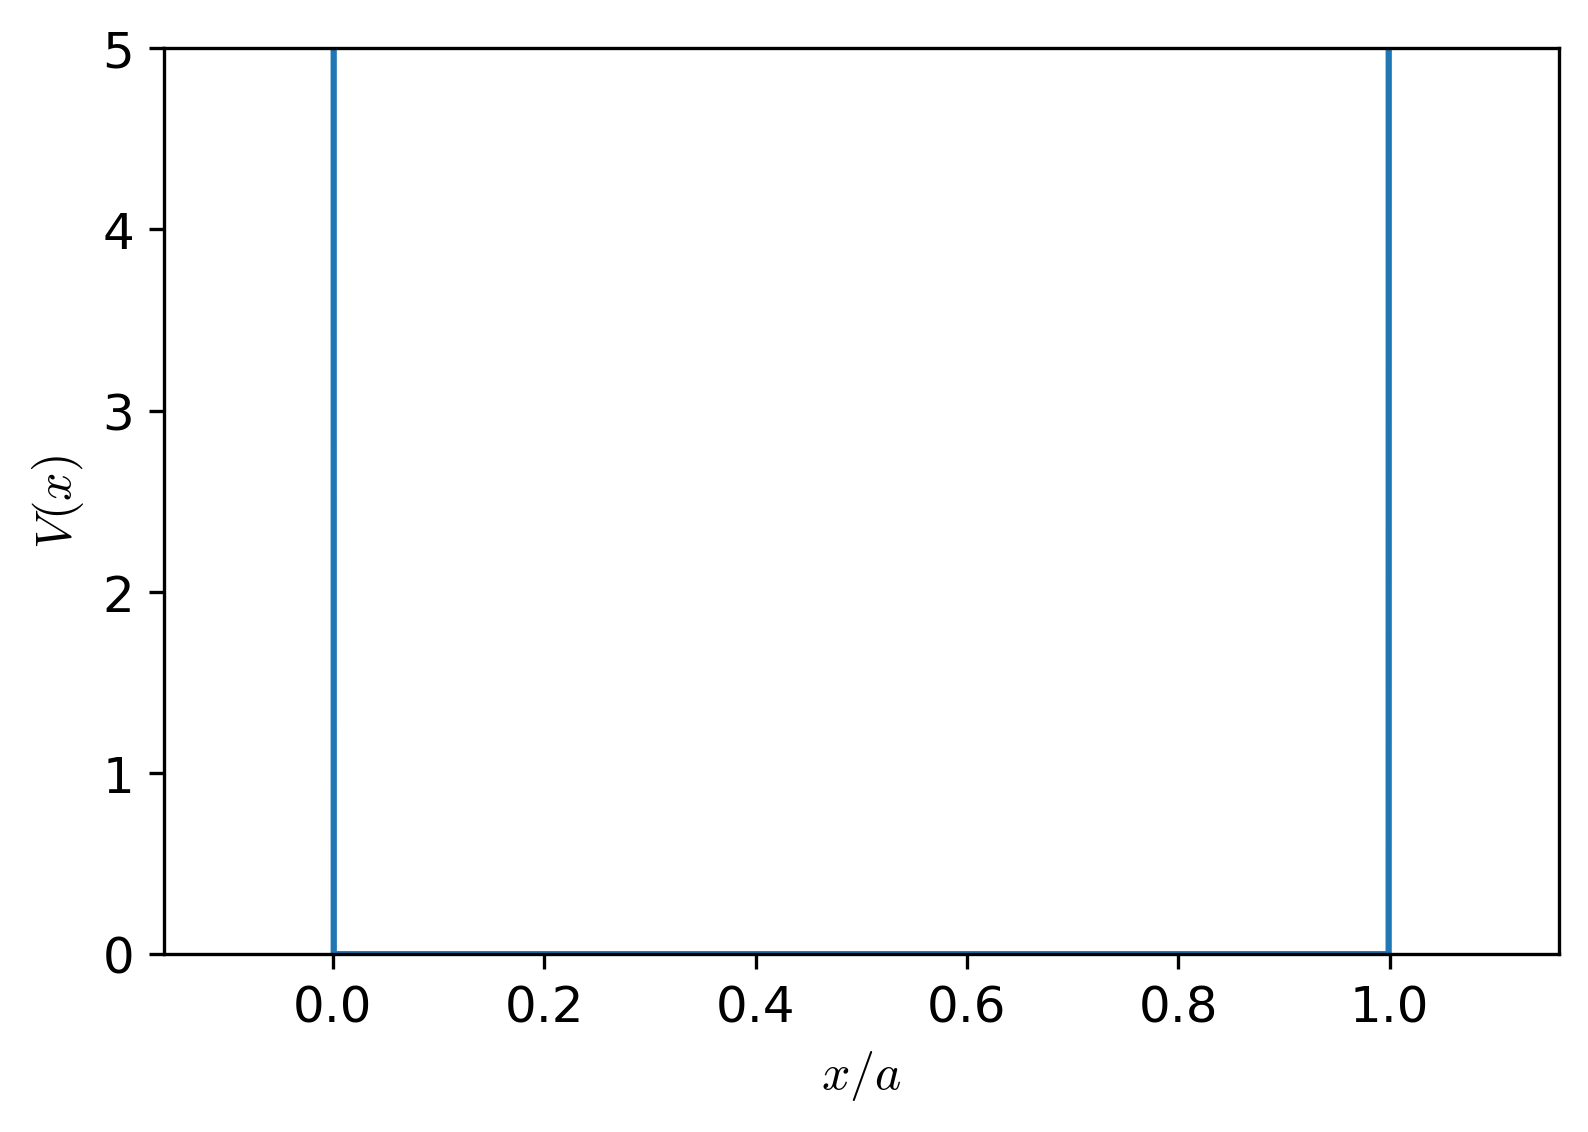

The *stationary states* of the 1D particle-in-a-box (which are *eigenstates* or *eigenfunctions* of the Hamiltonian) are
\begin{equation}
\psi_n(x) = 
\begin{cases}
\sqrt{\frac{2}{a}}\sin\left(\frac{n\pi x}{a}\right), & 0 \leq x \leq a,\\
0, & \mathrm{otherwise},
\end{cases}
\end{equation}
and the corresponding *energies* (in a.u.) are
\begin{equation}
E_n = \frac{\pi^2n^2}{2ma^2},
\end{equation}
where $n=1,2,\ldots$ is the *quantum number* specifying the state.

The next cell defines Python functions that will be used later, which evaluate the particle-in-a-box eigenfunctions and energies as a function of $n$, $m$ and $a$ (in a.u.). 

**Run the next cell** to define these functions.

In [ ]:
def psi_pb(x,a,n):
    """Returns 1D particle-in-a-box wavefunction at position x 
    for box length a and quantum number n (box at 0 <= x <= a) """
    if x >= 0.0 and  x <= a:
        psi = math.sqrt(2.0/a)*np.sin(n*np.pi*x/a)
    else:
        psi = 0.0
    return psi

def E_pb(a,m,n):
    """Returns 1D particle-in-a-box energy 
    for box length a, particle mass m, and quantum number n""" 
    return math.pi**2*n**2/(2.0*m*a**2)

Let's look at an application of these functions to plot the wavefunctions and calculate and output the energies for the four lowest energy eigenstates for an electron ($m = 1$ in a.u.)  in a box of length $a = 2$ (in a.u.).

**Run the next cell**, which contains code to do these calculations.

In [ ]:
m = 1.0     # particle mass
a = 2.0     # box length
xmin = 0.0  # min x value
xmax = a    # max x value
nx = 100    # number of x values
nstates = 4 # number of states to calculate

x = np.linspace(xmin,xmax,nx) # define x at nx evenly spaced points between 0 and a

# calculate and output energies
print("Energy =", [E_pb(a,m,n) for n in range(1,nstates+1)])

# plot eigenstates
psi = np.vectorize(psi_pb) # vectorize function to evaluate psi(x) for array of x values
plt.figure()
for n in range(1,nstates+1):
    plt.plot(x,psi(x,a,n),label=n) 
plt.xlabel('position (a.u.)')
plt.ylabel('wavefunction (a.u.)')
plt.legend()
plt.show()

### Harmonic oscillator

The 1D harmonic oscillator is another simple model for which exact analytical solutions to the Schrödinger equation exist, and is a good model of molecular vibration for low amounts of vibrational excitation. 

The potential energy $V(x)$ as a function of position $x$ (for molecular vibration $x$ is the displacement from the equilibrium molecular geometry) is
\begin{equation}
V(x) = \frac{1}{2}kx^2,
\end{equation}
where $k$ is the *force constant*. The general form of the potential is shown below.

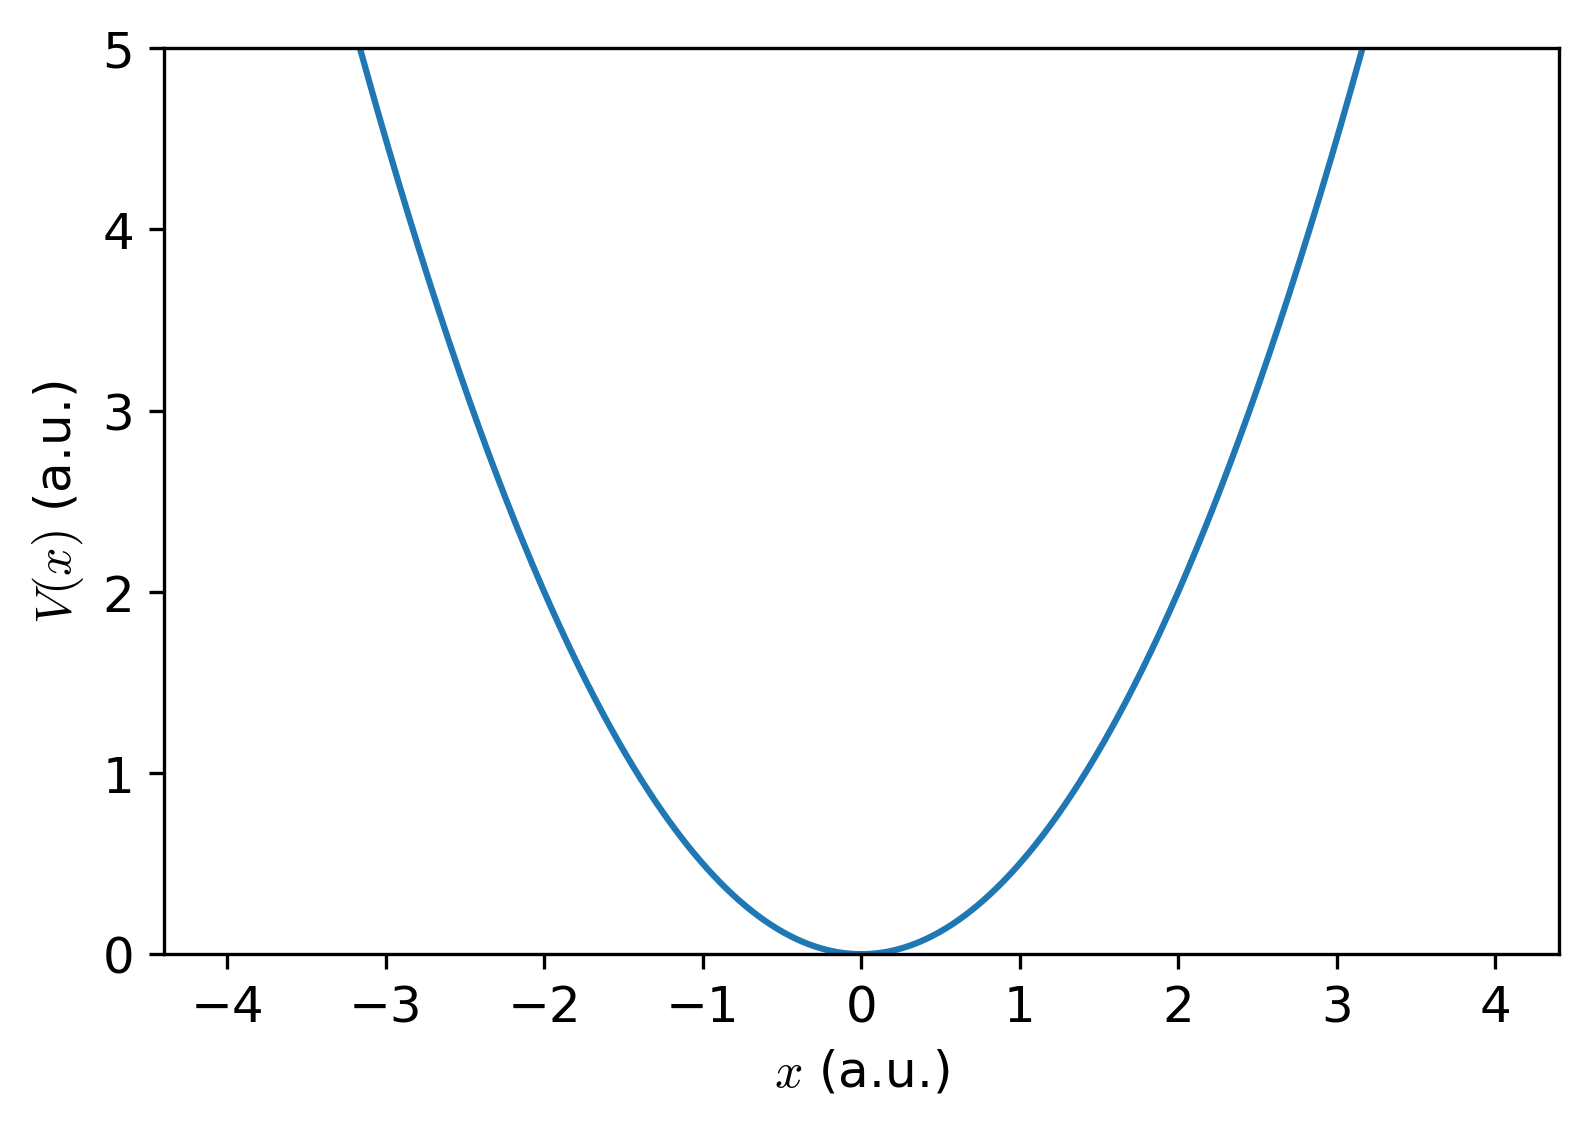

For molecular vibrations, the mass $m$ in the Schrödinger equation given above should be replaced by the *reduced mass* $\mu$ of the vibration, but for this workshop $m$ will be used.

The *stationary states* of the 1D harmonic oscillator are
\begin{equation}
\psi_v(x) =\frac{1}{\sqrt{2^v v!}}\left(\frac{\alpha}{\pi}\right)^{1/4}H_v(\alpha^{1/2}x)e^{-\alpha x^2/2}
\end{equation}
and the corresponding *energies* (in a.u.) are
\begin{equation}
E_v = \left(v+\frac{1}{2}\right)\omega_\mathrm{e},
\end{equation}
where $v = 0,1,2,\ldots$ is the *vibrational quantum number* specifying the state, $\omega_\mathrm{e} = \sqrt{\frac{k}{m}}$ is the *vibrational angular frequency*, $\alpha = \sqrt{km}$ (in a.u.), and $H_v(z)$ is the *Hermite polynomial* of order $v$. 

The Python Scipy module contains many special functions, including Hermite polynomials. The next cell defines Python functions that will be used later, which use Hermite polynomials from scipy to evaluate the harmonic oscillator eigenfunctions and energies as a function of $v$, $m$ and $k$ (in atomic units). 

**Run the next cell** to define these functions.

In [ ]:
from scipy.special import eval_hermite
def psi_ho(x,m,k,v):
    """Returns 1D harmonic-oscillator wavefunction at position x 
    for particle mass m, force constant k, and quantum number v"""
    alpha = math.sqrt(k*m)
    omega = math.sqrt(k/m) # angular frequency
    return (1.0/math.sqrt(2.0**v*math.factorial(v)))*math.pow(alpha/math.pi,0.25) \
            *eval_hermite(v,math.sqrt(alpha)*x)*np.exp(-0.5*alpha*x**2)

def E_ho(m,k,v):
    """Returns 1D harmonic-oscillator  energy 
    for particle mass m, force constant k, and quantum number v"""
    omega = math.sqrt(k/m) # angular frequency
    return (v+0.5)*omega

**Question 1:**
- Using the code above for the particle-in-a-box as a template, in the next cell plot the eigenfunctions and calculate and output the energies for the three lowest energy eigenstates for an electron in a harmonic potential with force constant $k = 4$ (in a.u.). You will need to choose an appropriate range of values of the position $x$ in your plot.

**Answer 1 (code):**

## Finite-difference method

The Schrödinger equation cannot be solved exactly for most quantum systems. The *finited-difference method (FDM)* is a method for solving differential equations such as the Schrödinger equation by approximating derivatives by finite differences between discrete points. This allows the differential equation to be represented as a set of algebraic equations that can be solved using matrix algebra.

The first derivative of a function $f(x)$ can be approximated at position $x$ using a finite difference between two neighbouring points separated by a distance $\Delta x$ as
\begin{equation}
\frac{\mathrm{d}f(x)}{\mathrm{d}x} \approx \frac{f\left(x+\frac{1}{2}\Delta x\right) - f\left(x-\frac{1}{2}\Delta x\right) }{\Delta x},
\end{equation}
with the approximation becoming exact in the limit that the gride spacing $\Delta x \rightarrow 0$. The second derivative is obtained by applying this approximation a second time to each term in the previous equation to give
\begin{equation}
\frac{\mathrm{d}^2f(x)}{\mathrm{d}x^2} \approx \frac{f\left(x+\Delta x\right) - 2f\left(x\right) +f\left(x-\Delta x\right) }{\left(\Delta x\right)^2}.
\end{equation}

Thus, if the position $x$ in 1D is defined at $N$ evenly spaced points $x_i$, where $i = 1, 2, \ldots, N$, the second derivative of the wavefunction $\psi({x}_i)$ in the Schrödinger equation at position $x_i$ can be approximated as
\begin{equation}
\frac{\mathrm{d}^2\psi({x}_i)}{\mathrm{d}x^2} \approx \frac{\psi\left(x_i+\Delta x\right) - 2\psi\left(x_i\right) +\psi\left(x_i-\Delta x\right) }{\left(\Delta x\right)^2} 
= \frac{\psi\left(x_{i+1}\right) - 2\psi\left(x_i\right) +\psi\left(x_{i-1}\right)}{\left(\Delta x\right)^2},
\end{equation}
where the second equality uses the fact that the spacing between adjacent pairs of points is $\Delta x$.

Inserting this equation for the second derivative into the Schrödinger equation (in a.u.) gives
\begin{equation}
-\frac{1}{2m}\left(\frac{\psi\left(x_{i+1}\right) - 2\psi\left(x_i\right) +\psi\left(x_{i-1}\right)}{\left(\Delta x\right)^2} \right) + V(x_i)\psi(x_i) = E\psi(x_i).
\end{equation}
Using the shorthand $\psi_i \equiv \psi(x_i)$, $V_i \equiv V(x_i)$, and $t\equiv \frac{1}{2m\left(\Delta x\right)^2}$ simplifies this equation to
\begin{equation}
-t\psi_{i-1} + (2t + V_i)\psi_i - t\psi_{i+1} = E\psi_i.
\end{equation}
This equation is not well-defined at the first ($i = 1$) or last ($i = N$) points, so an assumption must be made about these boundary values for $\psi$. We will assume that $\psi_1 = \psi_N = 0$. For a *bound system* (one in which the particle is confined to a finite region of space), it is always possible to choose $x_1$ and $x_N$ far enough away from where the particle can exist so that this assumption is accurate.

The algebraic equation above for $\psi_i$ along with the conditions $\psi_1 = \psi_N = 0$ can be summarized in matrix form as
\begin{equation}
\begin{bmatrix}
2t + V_1 & -t       & 0        & 0        &  0     & \cdots & \cdots \\
 -t      & 2t + V_2 & -t       & 0        &  0     & \cdots & \cdots \\
  0      & -t       & 2t + V_3 & -t       &  0     & \cdots & \cdots \\
  0      & 0        & -t       & -t + V_4 & -t     & \cdots & \cdots \\
\vdots   & \vdots   & \vdots   & \vdots   & \vdots & \vdots & \vdots \\
  0      & 0        & 0        & 0        &        &  -t    & 2t + V_N  \\
\end{bmatrix}
\begin{bmatrix}
\psi_1\\
\psi_2\\
\psi_3\\
\psi_4\\
\vdots\\
\psi_N
\end{bmatrix}
=E
\begin{bmatrix}
\psi_1\\
\psi_2\\
\psi_3\\
\psi_4\\
\vdots\\
\psi_N
\end{bmatrix}
\end{equation}
This equation is an *eigenvalue equation* and can be written in shorthand as 
\begin{equation}
\mathbf{H}\vec{\psi} = E\vec{\psi},
\end{equation}
where $\vec{\psi}$ is the vector of wavefunction values evaluated at positions $x_i$ for $i=1,2,\ldots,N$, and $\mathbf{H}$ is the *Hamiltonian matrix*, which has elements
\begin{equation}
H_{ij} = -t\delta_{i(j-1)} + (2t + V_i)\delta_{ij} - t\delta_{i(j+1)}, 
\end{equation}
where $\delta_{ij}$ is the *Kronecker delta*.

Once the Hamiltonian matrix $\mathbf{H}$ is defined for the system of interest, using the potential energy $V_i$ at each position $x_i$, the eigenvalue equation can be solved to obtain the stationary states and energies of the system as the eigenfunctions and eigenvalues, respectively. Note that since $\mathbf{H}$ is an $N\times N$ matrix, the solution will consist of $N$ eigenfunctions and $N$ eigenvalues.

The `eigh` function in Scipy will be used to solve the eigenvalue equation. This function does not account for the grid spacing $\Delta x$ in the normalization of the eigenfunctions, so to obtain normalized wavefunctions the eigenfunctions produced by `eigh` must be divided by $\sqrt{\Delta x}$.

The next cell defines a function to calculate the Hamiltonian matrix in the finite-difference method given minimum and maximum $x$ values, the number of $x$ values, the particle mass $m$ and the potential energy $V(x)$.

**Run the next cell** to define this function.

In [ ]:
def Hmat_fd(x,V,m):
    """Returns Hamiltonian matrix for finite-difference method given 1D array 
    of positions x, potential energy function V(x), and particle mass m"""
    dx = x[1] - x[0]          # grid spacing
    t = 1.0/(2.0*m*dx*dx)     # constant for kinetic energy term
    Vx = np.diag(V(x))        # diagonal matrix with elements V(x_i)
    Tx = 2.0*t*np.identity(N) # matrix with diagonal kinetic energy terms
    # add off-diagonal terms to kinetic energy matrix
    for i in range(1,N):     
        Tx[i,i-1] = Tx[i-1,i] = -t
    H = Tx + Vx  # combine kinetic and potential energy terms
    return H

### Particle-in-a-box

As a first application of the finite-difference method, we will use it to solve the Schrödinger equation for the 1D particle-in-a-box. Since $\psi(x) = 0$ outside the box (where the potential energy $V(x)$ is infinite) and the finite-difference method assumes that $\psi(x)$ goes to zero at the boundary positions $x_1$ and $x_N$, these boundaries can be taken as the two ends of the box. So the matrix equation only needs to be solved for values of $\psi(x)$ inside the box, where the potential energy $V(x) = 0$.

The code in the next cell solves the Schrödinger equation using the finite-difference method for an electron ($m = 1$) in a 1D box of length $a = 2$ using $N = 50$ points inside the box and plots the wavefunctions and output the energies for the four lowest energy eigenstates.   

**Run the next cell** to calculate the eigenstates and energies.

In [ ]:
m = 1.0     # particle mass
a = 2.0     # box length
xmin = 0.0  # min x value
xmax = a    # max x value
N = 50      # number of x values 
nstates= 4  # number of eigenstates/energies to output

# define particle-in-a-box potential energy function inside box
def V_pb(x):
     return 0.0*x

x = np.linspace(xmin,xmax,N) # x at N evenly spaced points between xmin and xmax
dx = x[1] - x[0]             # grid spacing

H = Hmat_fd(x,V_pb,m)   # Hamiltonian matrix

E,psi = eigh(H)        # solve for eigenvalues E and eigenfunctions psi 
                       # (i,j element of NxN psi matrix is psi_j(x_i))
psi = psi/math.sqrt(dx)         # normalize eigenfunctions
print("Energy = ", E[:nstates]) # print energy for lowest nstates states

# plot eigenfunctions for lowest nstates states
plt.figure()
for i in range(nstates):
    plt.plot(x,psi[:,i],label=i+1)
plt.xlabel('position (a.u.)')
plt.ylabel('wavefunction or energy (a.u.)')
plt.legend()
plt.show()

The expectation (average) value of an observable $f(x)$ corresponding to the operator $\hat{f}(x)$ for a particle in a state with wavefunction $\psi(x)$ is given by
\begin{equation}
\langle f(x) \rangle = \frac{\int \psi^*(x)\hat{f}(x)\psi(x) \,\mathrm{d} x}{\int \psi^*(x)\psi(x) \mathrm{d} x}.
\end{equation}
Here, "$^*$" denotes the complex conjugate, but all the wavefunctions in this workshop are real, so $\psi^*(x) = \psi(x)$. 

The code in the following cell calculates the variance of the position $x$, $\langle x^2 \rangle - \langle x\rangle^2$ of the particle-in-a-box for $m=1$ and $a=2$ in its ground state, using the ground-state wavefunction calculated in the previous cell. The Scipy function `simps`, which does 1D integration using Simpson's rule, is used for the integration in the expectation value. The operators corresponding to the observables $x$ and $x^2$ are simply $x$ and $x^2$, respectively.

**Run the next cell** to estimate the variance of the position of the particle-in-a-box in its ground state.

In [ ]:
norm = simps(psi[:,0]*psi[:,0],x) 
xsq_av = simps(psi[:,0]*x**2*psi[:,0],x)/norm
x_av = simps(psi[:,0]*x*psi[:,0],x)/norm
variance = xsq_av - x_av**2

print("variance of position =", variance)

**Question 2:**
- Compare the energies for the 4 lowest energy eigenstates calculated by the finite-difference method with the exact particle-in-a-box energies.
- Using the code above applying the finite-difference method to the particle-in-a-box as a template, in the next cell study the effect of increasing the number of grid points, $N$, used in the finite-difference method and determine the value of $N$ required to reduce the error in the energy relative to the exact energy below 1%. (In your submitted answers, just give results for the final value of $N$).
- Plot the exact and approximate particle-in-a-box wavefunctions for for $n =$ 1 to 4, where $n$ is the quantum number, on the same graph in the next cell. on the same graph in the next cell. Do they agree? (Note that you may need to multiply some of the wavefunctions by -1 to compare.) Use different line styles to distinguish the approximate and exact wavefunctions. To reset the colour cycle for the curves between plotting the approximate and exact wavefunctions use the command `plt.gca().set_prop_cycle(None)`.

Give text answers in the following cell. Make sure that the cell is a "Markdown" cell using the drop-down menu at the top of the page.

**Answer 2 (code):**

**Answer 2 (text):**

### Double-well potential

The double-well potential is an example of a quantum system for which no analytical solution of the Schrödinger equation exists. So the Schrödinger equation must be solved numerically. The double-well potential is a useful model for the quantum states of real systems, such as the umbrella inversion of the ammonia molecule. The potential energy of a symmetric double well as a function of the displacement $x$ from equilibrium can be written as 
\begin{equation}
V(x) = \frac{b^2}{4d} - bx^2 + dx^4,
\end{equation}
where $b > 0$ and $d > 0$ are constants that determine the steepness of the potential and the height of the central barrier. The constant term in the potential makes the minimum value of the potential zero (at $x = \pm\sqrt{\frac{b}{2d}}$). The barrier is at $x = 0$ and has a height of $\frac{b^2}{4d}$.  

The next cell defines a Python function that evaluates the symmetric double-well potential as a function of $x$, $b$ and $d$ (in a.u.). 

**Run the next cell** to define this function.

In [ ]:
def V_double_well(x,b,d):
    """Returns symmetric double-well potential at position x defined by 
       V(x) = b^2/4d - b*x^2 + d*x^4 """
    return b**2/(4*d) - b*x**2 + d*x**4

Let's use this function to plot the symmetric double-well potential as a function of position $x$ for $b = 2$ and $d = 0.1$ (in a.u.).

**Run the next cell**, which contains code to do this calculation.

In [ ]:
b = 2.0      # quadratic term coefficient
d = 0.1      # quartic term coefficient
a = 6.0      # x limits in +/- directions
xmin = -a    # min x value
xmax = a     # max x value
N = 100      # number of x values 
Vmax = 20.0  # max V value to plot

x = np.linspace(xmin,xmax,N) # define x at evenly spaced points from xmin to xmax

# plot potential vs x
plt.figure()
for n in range(1,nstates+1):
    plt.plot(x,V_double_well(x,b,d)) 
plt.xlabel('$x$ (a.u.)')
plt.ylabel('$V(x)$ (a.u.)')
plt.ylim(0,Vmax)
plt.show()

**Question 3:**
- Using the code above for the particle-in-a-box as a template, write code in the next cell to calculate the energies and plot the wavefunctions of the symmetric double-well system  with $m=1$, $b = 2$, and $d = 0.1$ (in a.u.) using the finite-difference method. Note that the double-well potential wavefunctions do not go abruptly to zero anywhere, so you will need to choose a sufficiently wide range of $x$ values to calculate the wavefunctions accurately. (Make sure the wavefunction goes to zero well within the limits of the $x$ values used.) Make sure also to choose the number of grid points, $N$, large enough to converge the energies (i.e. such that the energies change by $<$1% if the number of grid points is doubled to $2N$).
- Output the energies for the 20 lowest energy eigenstates and plot the energies as a function of quantum number $n$ (state number). Since the `Hmat_fd` function only takes a potential energy function of one variable $x$ as an argument use a `lambda` ("anonymous") function to pass other parameters to the potential energy function, e.g. if the potential energy function is `V(x,a,b)`, use `H = Hmat_fd(x,lambda x: V(x,a,b),m)`.
- Plot the wavefunctions for the two lowest energy eigenstates and for the $n=20$ eigenstate (which has an energy significantly higher than central barrier in the potential)
- How many grid points $N$ and what range of $x$ values are required to converge the energies and eigenstates?
- Discuss the pattern of energies versus quantum number below and above the energy of the central barrier with reference to the plotted wavefunctions.

Give text answers in the following cell. Make sure that the cell is a "Markdown" cell using the drop-down menu at the top of the page.

**Answer 3 (code):**

**Answer 3 (text):**

**Question 4:**
- Using your finite-difference results, calculate the expectation (average) value of the potential energy (in a.u.) of the symmetric double-well system  with $m=1$, $b = 2$, and $d = 0.1$ (in a.u.) in its ground state. (The operator corresponding to the potential energy is the potential energy $V(x)$. Use the code used to calculate the expectation value of the position of the particle-in-a-box as a template.)

**Answer 4 (code):**

## Variational method

The variational method provides a means to estimate the *ground-state wavefunction* $\psi_\mathrm{g}$ and *energy* $E_\mathrm{g}$ based on the *variational principle*, which shows that the *expectation value of the energy* (i.e. the average energy) for *any approximate (trial) wavefunction* $\phi(x)$ (here in 1D),
\begin{equation}
E = \langle E \rangle_{\phi} = \frac{\int \phi^*(x)\hat{H}\phi(x) \,\mathrm{d} x}{\int \phi^*(x)\phi(x) \mathrm{d} x}\,\,,
\end{equation}
can never be smaller than the ground-state energy, i.e.
\begin{equation}
E \geq E_\mathrm{g}\,.
\end{equation}
Thus, the variational method finds the optimal estimate of the wavefunction and energy by minimizing the energy expectation value $E$ with respect to the set of $N$ parameters $c_{n}$, $n = 1,2,\ldots,N$, that define the approximate wavefunction $\phi$. 

For the case of an approximate wavefunction $\phi$ that depends linearly on the parameters $c_{i}$, i.e. (in 1D)
\begin{equation}
\phi(x) = \sum_{i=1}^N c_{n} f_n(x),
\end{equation}
where $f_n(x)$, $n = 1, 2,\ldots,N$ are known functions (called *basis functions*), it can be shown that minimizing $E$ corresponding to solving the matrix equation
\begin{equation}
\begin{bmatrix}
H_{11} - ES_{11} & H_{12} - ES_{12} & \cdots & H_{1N} - ES_{1N}\\
H_{21} - ES_{21} & H_{22} - ES_{22} & \cdots & H_{2N} - ES_{2N}\\
\vdots           & \vdots           &        & \vdots          \\
H_{N1} - ES_{N1} & H_{N2} - ES_{N2} & \cdots & H_{NN} - ES_{NN}\\
\end{bmatrix}
\begin{bmatrix}
c_{1}\\
c_{2}\\
\vdots\\
c_{N}
\end{bmatrix}
=0\,,
\end{equation}
where (in 1D) the Hamiltonian matrix elements are
\begin{equation}
H_{ij} \equiv \int_{-\infty}^{\infty} f_i^*(x) \hat{H} f_j(x)\,\mathrm{d}x
\end{equation}
and the overlap matrix elements are
\begin{equation}
S_{ij} \equiv \int_{-\infty}^{\infty} f_i^*(x) f_j(x)\,\mathrm{d}x.
\end{equation}
If the basis functions are *orthonormal*, then
\begin{equation}
S_{ij} = \delta_{ij} = 
\begin{cases}
1, & f_i = f_j\\
0, & f_i \neq f_j
\end{cases}
\end{equation}

The above matrix equation can be written in shorthand form as
\begin{equation}
\mathbf{H}\vec{c} - E\mathbf{S}\vec{c}= 0 \quad \Rightarrow \quad \mathbf{H}\vec{c} = E\mathbf{S}\vec{c},
\end{equation}
where $\mathbf{H}$ is the *Hamiltonian matrix* (whose elements are defined above), $\mathbf{S}$ is the *overlap matrix* (whose elements are defined above), and $\vec{c}$ is the *vector of basis function coefficents (parameters)* for the optimized state $\phi$ with energy $E$. 

$\mathbf{H}$ and $\mathbf{S}$ are *Hermitian* matrices, which means that $H_{ji}^* = H_{ij}$ and $S_{ji}^* = S_{ij}$. This type of matrix equation is a *generalized eigenvalue equation* and the solutions for $E$ and $\vec{c}$ are generalized eigenvalues and eigenvectors, respectively, with $N$ eigenvalues and eigenvectors produced for a trial wavefunction that is a linear combination of $N$ basis functions. The *lowest* eigenvalue and corresponding eigenvector correspond to the best estimate for the ground-state energy and wavefunction, respectively, of the quantum system.

If the basis functions are *orthonormal*, the overlap matrix is equal to the identity matrix, i.e. $\mathbf{S} = \mathbf{I}$, and the generalized eigenvalue equation above reduces to a standard eigenvalue equation,
\begin{equation}
\mathbf{H}\vec{c} = E\vec{c},
\end{equation} 

The next two cells define functions to calculate the Hamiltonian matrix and overlap matrix given a 1D array of $x$ values where the position of the particle is defined, a 2D array containing the basis functions $f_n(x)$, $n=1,2,\ldots,N$, the mass of the particle $m$ and the potential energy $V(x)$.

**Run the next cell** to define these functions.

In [ ]:
def Hmat_vm(x,basis,V,m):
    """Returns Hamiltonian matrix for variational method given 1D array 
    of positions x, 2D array of basis functions (i,j element is value
    of j-th basis function at x_i), 1D array of potential energy at
    each position x, and particle mass m"""
    N = len(basis[0])       # number of basis functions
    H = np.zeros((N,N))     # create empty Hamiltonian matrix
    # loop over elements in Hamiltonian matrix
    for i in range(N):
        f_i = basis[:,i]  # basis function f_i(x)
        for j in range(N):
            f_j = basis[:,j] # basis function f_j(x)
            f_j_deriv2 = np.gradient(np.gradient(f_j,x,edge_order=2),x,edge_order=2) # 2nd derivative of f_j
            Hij_integrand = f_i*((-0.5/m)*f_j_deriv2 + V*f_j) # f_i(x)H(x)f_j(x)
            H[i,j] = simps(Hij_integrand,x) # integrate f_i(x)H(x)f_j(x) over x
    return H

def Smat_vm(x,basis):
    """Returns overlap matrix for variational method given 1D array 
    of positions x and 2D array of basis functions 
    (i,j element is value of j-th basis function at x_i)"""
    N = len(basis[0])      # number of basis functions
    S = np.zeros((N,N)) # create empty overlap matrix
    # loop over elements in overlap matrix
    for i in range(N):
        f_i = basis[:,i] # basis function f_i(x)
        for j in range(N):
            f_j = basis[:,j] # basis function f_j(x)
            Sij_integrand = f_i*f_j      # f_i(x)f_j(x)
            S[i,j] = simps(Sij_integrand,x) # integrate f_i(x)f_j(x) over x
    return S

### Variational method for non-orthonormal basis functions

In the next example, the variational method will be used with *non-orthonormal* basis functions, which involves solving the *generalized eigenvalue equation* given above.

Specifically, a *trial wavefunction* $\phi$ that is a linear combination of *polynomial basis functions*,
\begin{equation}
f_n \propto 
\begin{cases}
x^n(a-x)^n, &0 \leq x \leq a\\
0, &\mathrm{otherwise}
\end{cases}, 
\end{equation}
where $n = 1,2,\ldots, N$, will be used. The basis functions will be *normalized* such that
\begin{equation}
\int_{-\infty}^{\infty} \left[f_n(x)\right]^2 \,\mathrm{d}x = 1.
\end{equation}
This set of basis functions is defined (in a.u.) by the Python function in the next cell. 

**Run the next cell** to define the basis set.

In [ ]:
def poly_basis(x,N,a):
    """Returns set of normalized basis functions proportional to x^n(a-x)^n,  
    n = 1,2,...,N, for x values in the 1D array x, as a 2D array with 
    different basis functions in columns and different x values in rows."""
    for n in range(1,N+1):
        fn = np.array([math.pow(xi*(a-xi),n) for xi in x]) # n-th basis function vs x
        norm = simps(fn*fn,x)       # normalization constant for basis function
        fn = fn/math.sqrt(norm)     # normalize basis function
        if n == 1:
            basis_fns = fn
        else:
            basis_fns = np.vstack((basis_fns,fn)) # stack basis functions vs x in rows of 2D array
    return basis_fns.T   # return transpose of matrix so basis function are in columns

#### Particle-in-a-box

As a first application, we will use the variational method with the polynomial basis set just defined to estimate the *ground-state energy* and *wavefunction* of the 1D particle-in-a-box.

The code in the next cell solves the Schrödinger equation using the variational method for an electron ($a=1$) in a 1D box of length $a=2$ (in a.u.) using $N=2$
basis functions and $n_x = 500$ grid points between $x = 0$ and $x = a$ (Note that $x$ only needs to be defined inside the box because the basis functions are zero outside the box). The code plots the basis functions and ground-state wavefunction, outputs the Hamiltonian matrix, overlap matrix, and ground-state energy, and compares the approximate wavefunction and energy with the exact particle-in-a-box ground-state wavefunction and energy.

**Run the next cell** to calculate the ground-state wavefunction and energy of the 1D particle-in-a-box with the variational method.

In [ ]:
a = 2.0    # box length
m = 1.0    # particle mass
xmin = 0.0   # min x value
xmax = a     # max x value
N = 2      # number of basis functions
nx = 500   # number of x values

x = np.linspace(xmin,xmax,nx)   # define x at nx evenly spaced points between 0 and a
basis = poly_basis(x,N,a) # define basis functions at each position x

# plot basis functions
plt.figure()
for n in range(N):
    plt.plot(x,basis[:,n],label=n+1)
plt.xlabel('position (a.u.)')
plt.ylabel('basis function (a.u.)')
plt.legend()
plt.show()

V = np.zeros(nx)         # particle-in-a-box potential (zero) at each position x inside box
H = Hmat_vm(x,basis,V,m) # Hamiltonian matrix
S = Smat_vm(x,basis)     # overlap matrix
print("H =", H)          # print Hamiltonian matrix
print("S =", S)          # print overlap matrix

E,c = eigh(H,S)          # solve generalized eigenvalue equation for energy E 
                         # and basis function coefficients c of optimized wavefunctions
phi = np.dot(basis,c)    # calculate optimized wavefunctions as phi_i = sum_n c_n,i f_n  
                         # using matrix product of basis function and coefficient matrices.
                         # the wavefunctions phi_i(x) are in the columns of the resulting matrix.
print("Energy  =", E)     # print energy eigenvalues (lowest is optimal ground-state energy)
print("Coefficients =", c) # print coefficient matrix

# calculate exact ground-state wavefunction and energy
psi_exact = np.vectorize(psi_pb) # vectorize function to evaluate psi(x) for x vector 
E_exact = E_pb(a,m,1)
print("Energy (exact) =", E_exact)

# plot variational and exact ground-state wavefunctions
plt.figure()
plt.plot(x,-phi[:,0],label='variational')  # variational ground-state wavefunction in
                                           # 1st column of phi matrix (minus sign to compare 
                                           # with exact wavefunction
plt.plot(x,psi_exact(x,a,1),'--',label='exact')
plt.xlabel('position (a.u.)')
plt.ylabel('wavefunction (a.u.)')
plt.legend()
plt.show()

**Question 5:**
- How do the variational and exact ground-state wavefunction and energy compare?

Answer in the next cell. Make sure that the cell is a "Markdown" cell using the drop-down menu at the top of the page.

**Answer 5 (text):**

### Variational method for orthonormal basis functions

In the exercise, the variational method will be used with *orthonormal* basis functions, which involves solving the *ordinary eigenvalue equation* given above.

Specifically, a *trial wavefunction* $\phi$ that is a linear combination of *cosine basis functions* that go to zero at $x = \pm a$,
\begin{equation}
f_n = 
\begin{cases}
\sqrt{\frac{1}{a}}\cos\left[\frac{2(n-1)\pi x}{2a} \right], & -a \leq x \leq a\\
0, &\mathrm{otherwise}
\end{cases}, 
\end{equation}
where $n = 1,2,\ldots, N$, will be used.
This set of basis functions is defined (in a.u.) by the Python function in the next cell. 

In this case the overlap matrix does not need to be defined and the eigenvalue equation can be solved using the Scipy `eigh` function with a single argument, the Hamiltonian matrix. (Solving the generalized eigenvalue equation will give the same result (within numerical error), because the overlap matrix will be identity matrix for cosine basis functions.)

**Run the next cell** to define the basis set.

In [ ]:
def cosine_basis(x,N,a):
    """Returns set of normalized cosine basis function   
    n = 1,2,...,N, for x values in the 1D array x, 
    as a 2D array with different basis functions in columns and 
    different x values in rows."""
    for n in range(1,N+1):
        fn = np.array([math.cos((2.*n-1.)*math.pi*xi/(2.*a)) for xi in x])
        fn = fn*math.sqrt(1./a)
        if n == 1:
            basis_fns = fn
        else:
            basis_fns = np.vstack((basis_fns,fn)) # stack basis functions vs x in rows of 2D array
    return basis_fns.T # return transpose of matrix so basis function are in columns

#### Double-well potential

**Question 6:**
- Using the code above for the particle-in-a-box as a template, write code to use the variational method with the cosine series basis set defined above to calculate the ground-state energy and plot the ground-state wavefunction of the symmetric double well with potential energy $(x) = \frac{b^2}{4d} - bx^2 + dx^4$.
- Plot the ground-state wavefunction for the symmetric double well for mass $m =1$ and parameters $b = 2$ and $d = 0.1$ (in a.u.) on the same graph as the converged ground-state wavefunction for the same system calculated previously with the finite-difference method. You may need to change the sign of one of the wavefunction to compare. Use the same number of grid points and range $x$ values that you used for the corresponding finite-difference calculation. 
- Plot the approximate ground-state energy from the variational method versus number of basis functions, $N$.
- What do you notice about the approximate energy and wavefunction as the number of basis functions is increased? Are these results consistent with the variational principle?
- Determine the number of basis functions, $N$, required in the variational method to converge energy to within 1\% of the converged ground-state energy calculated previously using the finite-difference method.

Give text answers in the following cell. Make sure that the cell is a "Markdown" cell using the drop-down menu at the top of the page.

**Answer 6 (code):**

**Answer 6 (text):**